In [18]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import glob


In [19]:
file = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/Non-AMD/" 

img_file = list(glob.glob1(file, "*.jpg"))
img = []
for i in img_file:
    img.append(i)

data = []
for i in img:
    image_path = file + i
    gray=Image.open(image_path)
    gray_resiz = gray.resize((256, 256))
    arr_gray = np.array(gray_resiz)
    data.append(arr_gray)


In [20]:
d = np.array(data)


In [21]:
d.shape

(311, 256, 256, 3)

In [22]:
file1 = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/AMD/" 

img_file1 = list(glob.glob1(file1, "*.jpg"))
img1 = []
for i in img_file1:
    img1.append(i)

data1 = []
for i in img1:
    image_path1 = file1 + i
    gray1=Image.open(image_path1)
    gray_resiz1 = gray1.resize((256, 256))
    arr_gray1 = np.array(gray_resiz1)
    data1.append(arr_gray1)


In [23]:
d1 = np.array(data1)


In [24]:
d1.shape

(89, 256, 256, 3)

In [25]:
df = np.concatenate((d, d1), axis = 0)
df.shape

(400, 256, 256, 3)

In [26]:
d_label = [0]*311
d1_label = [1]*89

In [27]:
y = np.concatenate([d_label, d1_label])


In [28]:
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import np_utils

In [29]:
# # #Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)

# x_train = pd.concat([df.iloc[:135, :100], df.iloc[168:303,:100]], axis = 0, ignore_index = True).values
# x_test =pd.concat([df.iloc[135:168, :100], df.iloc[303:,:100]], axis = 0, ignore_index = True).values
# y_train = pd.concat([df.iloc[:135, 100], df.iloc[168:303,100]], axis = 0, ignore_index = True).values
# y_test = pd.concat([df.iloc[135:168, 100], df.iloc[303:, 100]], axis = 0, ignore_index = True).values


In [30]:
import keras
y_train = keras.utils.np_utils.to_categorical(y_train,2)
y_test = keras.utils.np_utils.to_categorical(y_test,2)


In [31]:
y_train.shape

(320, 2)

In [32]:
# Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.applications import InceptionResNetV2
model_cnn = tf.keras.models.Sequential([
    InceptionResNetV2(input_shape=(256,256,3), include_top=False),
])
for layer in model_cnn.layers:
  layer.trainable = False

model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(2, activation='sigmoid'))

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 6, 6, 1536)       54336736  
 onal)                                                           
                                                                 
 conv2d_407 (Conv2D)         (None, 4, 4, 64)          884800    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)               

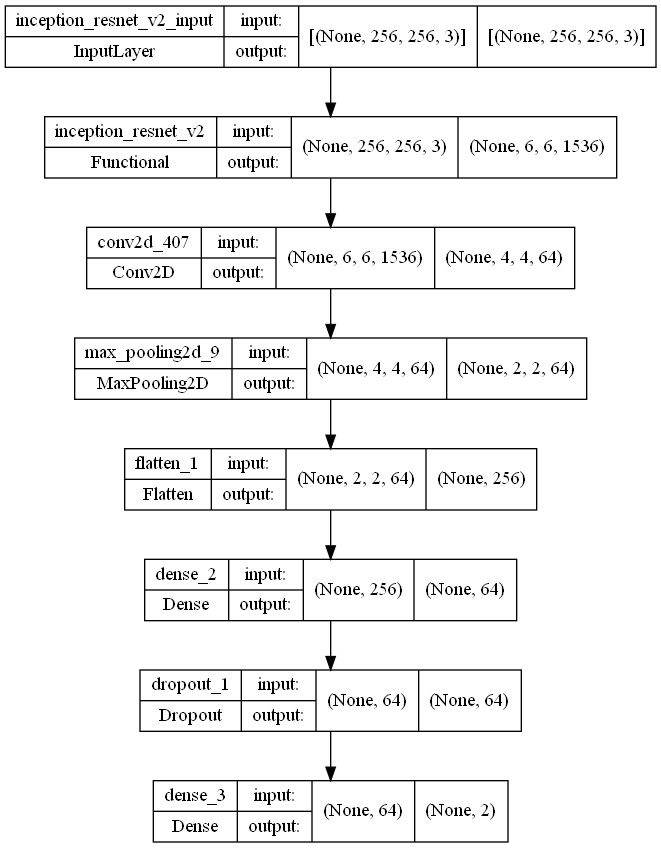

In [33]:
from tensorflow.keras.utils import plot_model

#model = Model(inputs=[mlp.input, model_cnn.input], outputs=x)

plot_model(model_cnn, "multi_input_and_output_model.png", show_shapes=True)

In [34]:

loss = keras.losses.BinaryCrossentropy()
model_cnn.compile(loss= loss, optimizer= 'adam', metrics=['accuracy','Precision','Recall','AUC'])
# train the model
print("[INFO] training model...")

h = model_cnn.fit(x=x_train, y=y_train, epochs=50, batch_size=32)

[INFO] training model...
Epoch 1/50
10/10 [==============================] - 173s 10s/step - loss: 47.9941 - accuracy: 0.6969 - precision: 0.6667 - recall: 0.6500 - auc: 0.6702
Epoch 2/50
10/10 [==============================] - 101s 10s/step - loss: 7.5049 - accuracy: 0.6187 - precision: 0.5963 - recall: 0.6094 - auc: 0.6512
Epoch 3/50
10/10 [==============================] - 106s 11s/step - loss: 0.7011 - accuracy: 0.7437 - precision: 0.6437 - recall: 0.8469 - auc: 0.6106
Epoch 4/50
10/10 [==============================] - 106s 11s/step - loss: 0.6887 - accuracy: 0.7656 - precision: 0.7656 - recall: 0.7656 - auc: 0.7595
Epoch 5/50
10/10 [==============================] - 101s 10s/step - loss: 0.6842 - accuracy: 0.7656 - precision: 0.7656 - recall: 0.7656 - auc: 0.7766
Epoch 6/50
10/10 [==============================] - 100s 10s/step - loss: 0.6809 - accuracy: 0.7656 - precision: 0.7656 - recall: 0.7656 - auc: 0.7390
Epoch 7/50
10/10 [==============================] - 85s 8s/step - lo

In [35]:
score = model_cnn.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])


3/3 [==============================] - 26s 5s/step - loss: 0.5209 - accuracy: 0.8250 - precision: 0.8250 - recall: 0.8250 - auc: 0.8250
loss= 0.5209482908248901
accuracy= 0.824999988079071
